# Exploratory Data Analysis : Iris Dataset

** Author:**  Rucmanidevi Sethu  
** Purpose:** Perform EDA using Pandas and Seaborn on the Iris dataset  
** Date   :** September 17th,2025  

## 1. Imports

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

## 2. Load the Iris Dataset

In [4]:
# Load the Iris dataset into a pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')
# List column names
iris_df.columns
# Inspect first few rows of the DataFrame
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Initial Data Inspection

In [5]:
# specify the number of rows to display
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [6]:
# Inspect the shape of the DataFrame with the shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
iris_df.shape

(150, 5)

In [7]:
# Inspect the DataType of columns with dtypes attributes
# The data types are returned as a pandas Series
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# Inspect the DataTypes of the column with info () method
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 4. Initial Descriptive Statistics

In [9]:
# Inspect summary statistics for numerical coulmns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 5a. Initial Data Distribution for Numerical Columns

<Axes: >

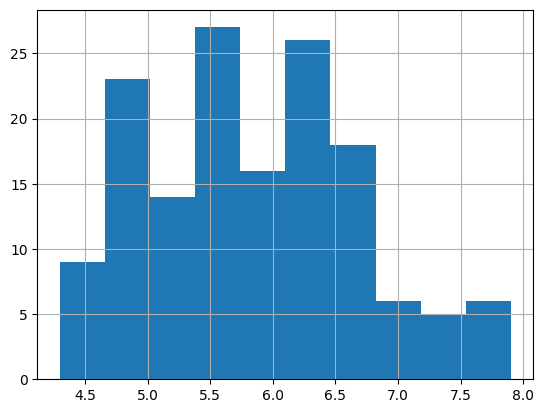

In [10]:
# Inspect histogram by one numerical column
iris_df['sepal_length'].hist()

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

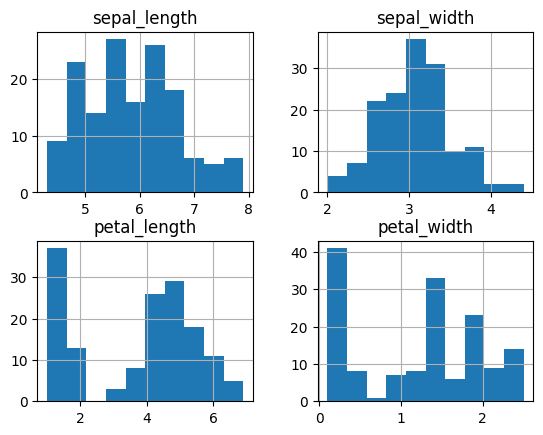

In [11]:
# Inspect histogram for all numerical columns
iris_df.hist()

In [12]:
# Show all plots
matplotlib.pyplot.show()

1. The Sepal length is  distributed around 5.5 to 6.2 cm .  
2. The Sepal width is high at 3 cm and does not seem to be evenly distributed.   
3. The Petal length on two or more species are at different peaks, one at 1.5 cm and the other at 5.5 cm.
4. The Petal width ranges between 0.2 cm and 1.5 cm

# 5b. Initial Data Distribution for Categorical Columns

In [14]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

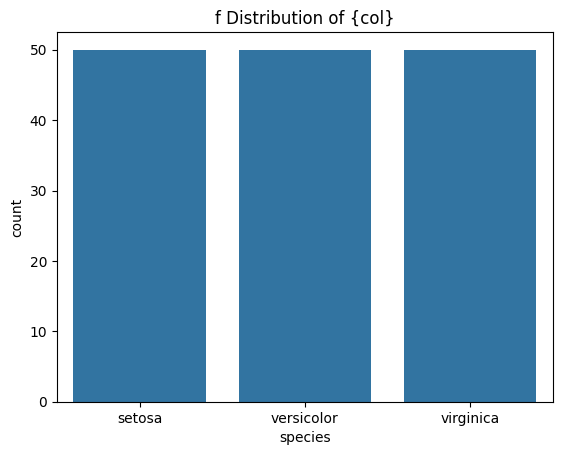

In [17]:
# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include= ['object' ,'category']).columns:
    # Display count plot
    sns.countplot(x=col,data=iris_df)
    matplotlib.pyplot.title('f Distribution of {col}')
    matplotlib.pyplot.show()

In [20]:
# Show all plots
matplotlib.pyplot.show()


The iris dataset consists of 3 different species(setosa, versicolor and virginica) with a even sampleset of 50 each.

## 6. Initial Data Transformation and Feature Engineering

In [21]:
##  Feature Engineering
## Renaming a column
iris_df.rename( columns= {'sepal_length': 'Sepal Length'},inplace= True)

# Adding a new column
iris_df['Sepal_Area']=iris_df['Sepal Length']*iris_df['sepal_width']

# 7. Initial Visualizations

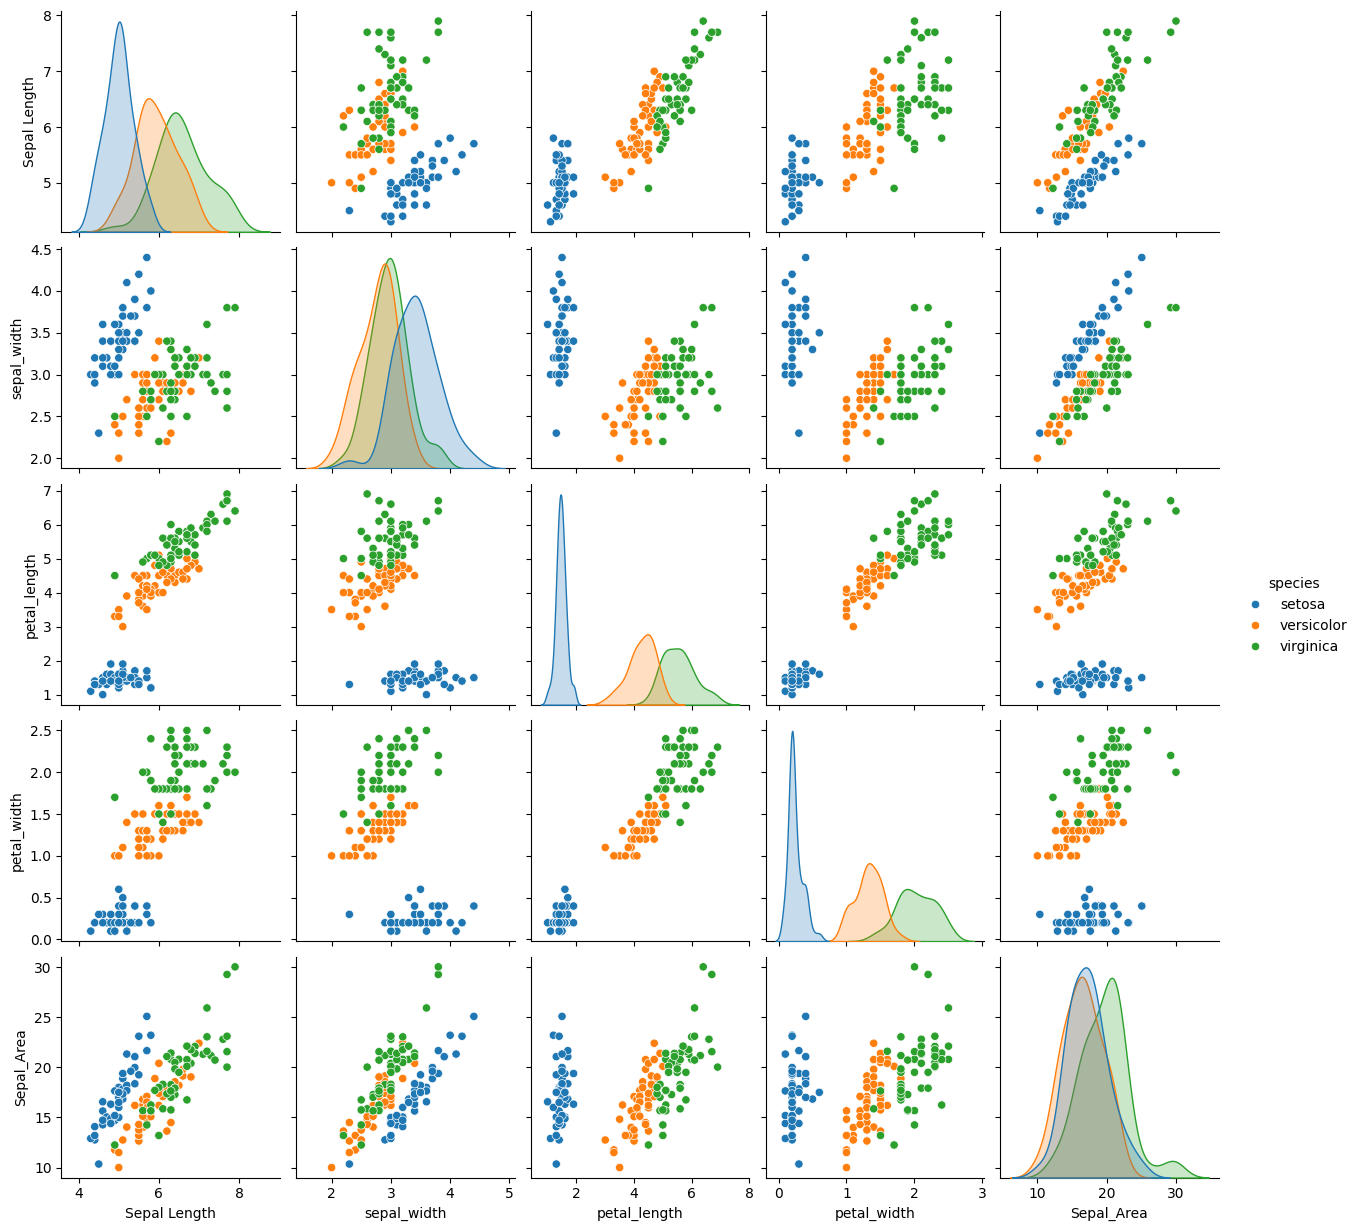

In [24]:
# Create a pairplot of the Iris dataset
# A pairplot is a grid of scatter plots for each pair of numerical columns in the dataset
# The hue parameter is used to color the data points 
# by species (a categorical column)
sns.pairplot(iris_df, hue='species')

# Show all plots
matplotlib.pyplot.show()


From the Pairplot, the Setosa species tend to have shorter but wider Sepals when compared to Virginca which has tall and narrow sepals. The Versicolor species falls in between these two series . The Setosa look different from the other two (Versicolor and Verginica) species.The Petal length and width are shorter and wider when compared to Versicolor and Verginica.The Sepal area shows that the Verginca species have the largest Sepal area.

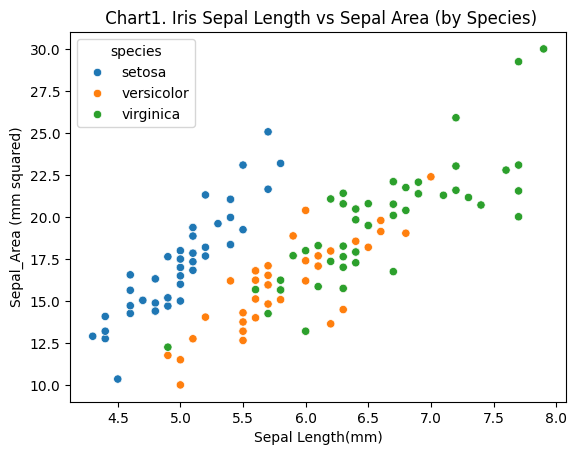

In [34]:
# A scatter plot is a plot of two numerical variables.
scatter_plt: Axes = sns.scatterplot(
    data=iris_df, x="Sepal Length", y="Sepal_Area", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Sepal Length(mm)")
scatter_plt.set_ylabel("Sepal_Area (mm squared)")

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title(" Chart1. Iris Sepal Length vs Sepal Area (by Species)")
matplotlib.pyplot.show()

This Scatter plot compares the Sepal length vs the Sepal area across the three species. The Setosa species has a shorter Sepal length and a smaller Sepal area.  Versicolor falls between Setosa and Virginica. Virginica has longer sepals and also a larger sepal area

# 8. Initial Insights
1. Setosa stands out as a distinct species with shorter petals and wider sepals.
2. Versicolor falls in-between Setosa and virginica with moderate Sepal length and dimensions.
3. Virginica has the longest petal and sepal with the largest sepal area among the three species. 

## 9. Annotate Your Notebook for Storytelling and Presentation
	Exploring Iris Morphology: A Data-Driven Story
Hello! I'm Rucmani, I am exploring the classic “Iris dataset”, I am analyzing the measurement of flowers and trying to understand the characteristics of different species.

The Goal of this EDA (Exploratory data analysis) project is to interpret the visualization and statistics and understand the patterns of different species. 

	Understanding the Iris Dataset:
Iris dataset consists of three species:
  1.	Setosa
  2.	Versicolor
  3.	Virginica
The data describes each color by its Sepal length, width, Petal length and width in mm.
In this analysis, I added a new field to calculate the Sepal Area [Sepal length)* (Sepal Width)]
I created a Pairplot to analyze how the features interact across species.
  1. Setosa stands out as a distinct species with shorter petals and wider sepals.
  2. Versicolor falls in between Setosa and virginica with moderate Sepal length and dimensions.
  3. Virginica has the longest petal and sepal with the largest sepal area among the three species.
I added Distribution curves density plots to show how features like sepal length, petal width is distributed across the three species.
I added a Scatter plot to analyze the Sepal length vs Sepal Area for the 3 species.
The lower left in the chart indicates that Setosa species have shorter sepals in smaller areas.
The upper right in the chart indicates that Virginica species have longer sepals and covers a larger area.
The Versicolor species lies between the two with moderate length and coverage area.  
   Conclusion:  
             Through this EDA Project I understand how simple flower measurements can reveal patterns. I also learnt that visual story telling can be made interesting by adding statistical analysis like we did in this project.
